2. 2-class minimum-error classification based on KDE estimates
In this problem you may use NumPy, sklearn, and matplotlib.
This problem is 2-dimensional (2 features).
Let the class-conditional density functions for a 2-class problem be:
p$𝑥F𝑆!% = α!𝑝!$𝑥% + α"𝑝"$𝑥% 𝑝!$𝑥% = NL𝑥M𝑚!, Σ!P , 𝑝"$𝑥% = U$#(0,2)U$"(−1,1) 𝑚! = '−4 0*, Σ! = '4 0 0 1* 𝑝$𝑥F𝑆"% = NL𝑥M𝑚", Σ"P 𝑚" = '−0.5 0 *, Σ" = '0.16 0 0 9*
with 𝛼! = 0.7, 𝛼" = 0.3, and the priors are 𝑃(𝑆!) = 𝑃(𝑆") = 0.5.
Note: For all feature-space plots in this problem, use the following ranges for your axes: 𝑥! ∈ [−8,4], 𝑥" ∈ [−6,6] for consistency.

(a) True Bayes minimum error classifier
Give an expression for the Bayes minimum error decision rule algebraically, in terms of 𝑑+ $𝑥,𝑚'%, Σ', 𝑃(𝑆'), 𝑖 = 1,2. Suggestion: use the indicator function for the uniform density. Plot (by computer is probably easier) in 2D feature space, the decision boundary and regions, as well as the means of the 3 densities (2 means in S!, 1 mean in 𝑆"). (1 final expression and 1 plot)

In [18]:
# Importing the necessary libraries:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
import random
from scipy.spatial import distance

In [19]:
# Initializing the matrices:
mat_1 = np.array([-4, 0])
mat_2 = np.array([-0.5, 0])
sigma_1 = np.array([[4, 0], [0, 1]])
sigma_2 = np.array([[0.16, 0], [0, 9]])

In [20]:
def dataset_generator(x_1, x_2):
    # Defining the lower and upper bounds fo the datapoints:
    if 0 <= x_1 and x_1 <= 2 and -1 <= x_2 and x_2 <= 1:
        return 1
    
    else:
        return 0

In [21]:
x = np.linspace(-8, 4, 100)
y = np.linspace(-6, 6, 100)
maha_1 = list() 
maha_2 = list()
power_ex = list()
plot_x, plot_y = np.meshgrid(x, y)
stacked_data = np.stack((np.ravel(plot_x), np.ravel(plot_y)), axis = 1)

for data in stacked_data:
    maha_1.append((distance.mahalanobis(data, mat_1, np.linalg.inv(sigma_1))) ** 2)
    maha_2.append((distance.mahalanobis(data, mat_2, np.linalg.inv(sigma_2))) ** 2)
    power_ex.append(dataset_generator(data[0], data[1]))
    
maha_1 = np.array(maha_1).reshape([100, 100])
power_ex = np.array(power_ex).reshape([100, 100])
maha_2 = np.array(maha_2).reshape([100, 100])
g1 = 0.7 * (np.exp(-0.5 * maha_1)) / (2 * np.pi * np.linalg.det(sigma_1)) + 0.3 * 0.25 * power_ex
g2 = np.exp(-0.5 * maha_2) / (2 * np.pi * np.linalg.det(sigma_2))
boundary = np.where(g1 > g2, 1, 2)

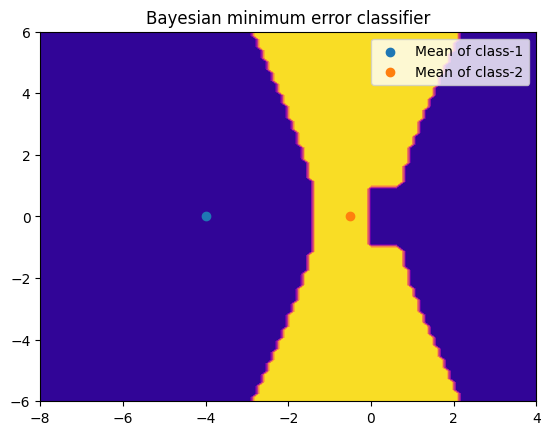

In [22]:
plt.contourf(plot_x, plot_y, boundary, cmap = 'plasma')
plt.scatter(mat_1[0], mat_1[1], label = "Mean of class-1")
plt.scatter(mat_2[0], mat_2[1], label = "Mean of class-2")
plt.title("Bayesian minimum error classifier")
plt.legend()
plt.show()

(b) Dataset generation.
Draw and store N, = 20,000 data points from p$𝑥, S-%, in a 20,000 × 3 matrix (the 3 columns are 𝑥!, 𝑥", 𝑘). This is the “full training dataset”, and your training datasets below will come from this. (No need to report anything.)
Separately, draw and store N,./0 = 10,000 data points from 𝑝$𝑥, 𝑆1%, in a 10,000 × 3 matrix. This will be your testing set. Similarly, to draw from 𝑝$𝑥|𝑆!% you can first draw randomly a value of 1 (with probability 0.7) or 2 (with probability 0.3) (biased coin flip). If 1 was drawn, then draw x from 𝑝!(𝑥); if 2 was drawn, then draw x from 𝑝"(𝑥). To visualize the data, produce a scatter plot in 2D feature space of the first 2000 points in the full training set, with a different symbol or color for each class.

In [23]:
N = 20000
N_T = 10000
training_dataset = np.zeros([N, 3])

for ele in range(N):
    alpha = random.random()

    if alpha < 0.5:
        label = 1
        
        if alpha < 0.7:
            x = np.random.multivariate_normal(mat_1, sigma_1)
        
        elif alpha < 0.3:
            x = np.array([np.random.uniform(0, 2), np.random.uniform(-1, 1)])
    
    else:
        label = 2
        x = np.random.multivariate_normal(mat_2, sigma_2)
    
    training_dataset[ele, :] = np.concatenate([x, [label]])
    
testing_dataset = np.zeros([N_T, 3])

for t_data in range(N_T):
    alpha = random.random()
    
    if alpha < 0.5:
        label = 1
        
        if alpha < 0.7:
            x = np.random.multivariate_normal(mat_1, sigma_1)
        
        elif alpha < 0.3:
            x = np.array([np.random.uniform(0, 2), np.random.uniform(-1, 1)])
    
    else:
        label = 2
        x = np.random.multivariate_normal(mat_2, sigma_2)
    
    testing_dataset[t_data, :] = np.concatenate([x, [label]])

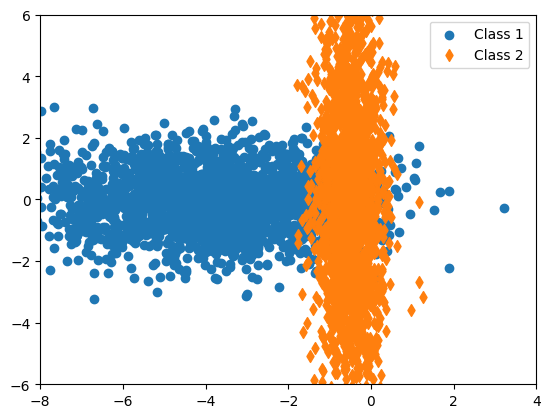

In [24]:
plt.scatter(training_dataset[training_dataset[:, -1] == 1][:2000, 0], training_dataset[training_dataset[:, -1] == 1][:2000, 1], label='Class 1')
plt.scatter(training_dataset[training_dataset[:, -1] == 2][:2000, 0], training_dataset[training_dataset[:, -1] == 2][:2000, 1], label='Class 2', marker = 'd')
plt.xlim([-8, 4])
plt.ylim([-6, 6])
plt.legend()
plt.show()

(c) Ideal accuracy.
Compute the classification accuracy of your classifier in (a) on the testing set.

In [25]:
test_accuracy = 0
predicted_labels = []

for labels in testing_dataset:
    g1 = 0.7 * (np.exp(-0.5 * distance.mahalanobis(labels[:2], mat_1, np.linalg.inv(sigma_1)) ** 2)) / (2 * np.pi * np.linalg.det(sigma_1)) + 0.3 * 0.25 * dataset_generator(labels[0], labels[1])
    g2 = np.exp(-0.5 * distance.mahalanobis(labels[:2], mat_2, np.linalg.inv(sigma_2)) ** 2) / (2 * np.pi * np.linalg.det(sigma_2))
    
    if g1 > g2:
        predicted_labels.append(1)
    else:
        predicted_labels.append(2)
        
for acc in range(len(predicted_labels)):
    if predicted_labels[acc] == testing_dataset[acc, 2]:
        test_accuracy += 1

print(f"Ideal accuracy during the testing phase= {100 * test_accuracy / len(predicted_labels)}%")

Ideal accuracy during the testing phase= 94.32%


(d) Minimum-error classifier based on estimates from the training data.
In this part your code will learn from the data without knowledge of the probabilities given above.
Repeat this part for a training set 𝒟# that uses the first n data points in the full training dataset, for 𝑛 = 200, 2000, 20000 (e.g., n=200 will result in 200 data points for 𝒟"22, some of which will be labeled 𝑆! and some of which will be labeled 𝑆"). Use KDE to get estimates 𝑝̂3$𝑥F𝑆!% and 𝑝̂#$𝑥F𝑆"% of the class-conditional densities from 𝒟#. Use a Gaussian window function: Φ$𝑢% = exp '−!" ||𝑢||"* with 𝑢 = $%! and kernel width (bandwidth) ℎ# = '!22# *#$ . (No need to report anything.)
(i) Use frequency of occurrence to estimate get estimates 𝑃 n (𝑆!), Pp(S") of the class priors from 𝒟#. (Report 2 values for each value of n)
(ii) Plot in 2D feature space the decision boundaries and decision regions for a Bayes minimum-error classifier based on your KDE and prior estimates from 𝒟#. (1 plot for each value of n)
(iii) Compute and report the classification accuracy on the testing set for the classifier based on 𝒟#. (1 accuracy for each value of n)

In [26]:
def kde_est(x, true_label, h):
    volume = 2 * np.pi * h ** 2
    values_alpha = np.zeros(x.shape[0])
    
    for i in range(x.shape[0]):
        values_alpha[i] = (1 / volume) * np.sum(np.exp(-0.5 * np.square(np.linalg.norm((x[i] - true_label) / h, axis = 1)))) / len(true_label)
    
    return values_alpha

Value of n-  200
++++++++++++++++++++
P(S1) = 0.44
P(S2) = 0.56


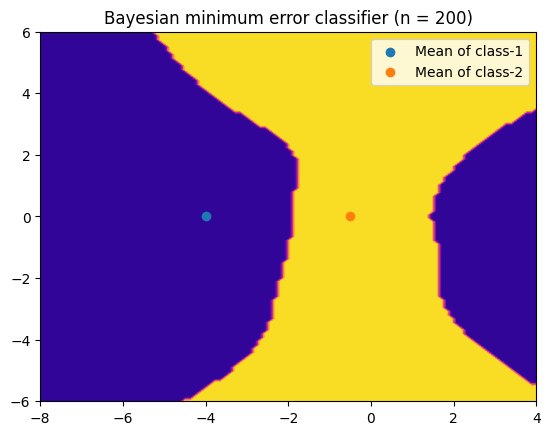

The accuracy during the testing phase= 93.44%
Value of n-  2000
++++++++++++++++++++
P(S1) = 0.5055
P(S2) = 0.4945


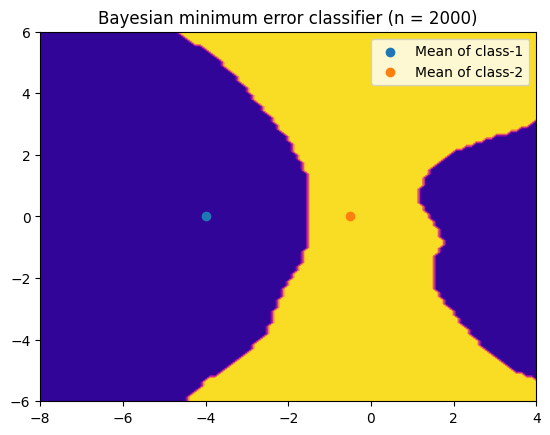

The accuracy during the testing phase= 94.54%
Value of n-  20000
++++++++++++++++++++
P(S1) = 0.50295
P(S2) = 0.49705


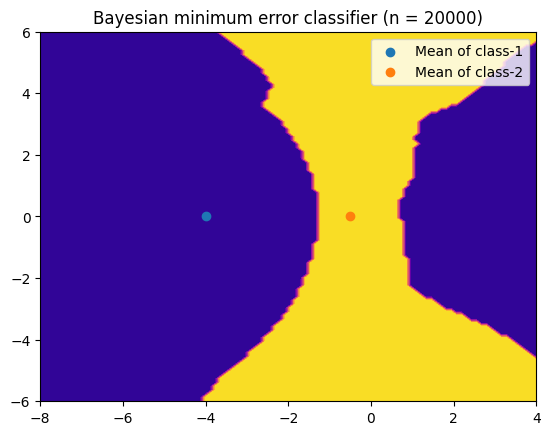

The accuracy during the testing phase= 95.29%


In [27]:
n = [200, 2000, 20000]

for iter in n:
    x = np.linspace(-8, 4, 100)
    y = np.linspace(-6, 6, 100)
    plot_x, plot_y = np.meshgrid(x, y)
    stacked_data = np.stack((np.ravel(plot_x), np.ravel(plot_y)), axis = 1)
    h = (100 / iter) ** 0.25
    training_dataupdated = training_dataset[:iter]
    x_trainingdata = training_dataupdated[:, :-1]
    training_labels = training_dataupdated[:, -1]
    class_1 = x_trainingdata[np.where(training_labels == 1)]
    class_2 = x_trainingdata[np.where(training_labels == 2)]
    p_1 = kde_est(stacked_data, class_1, h)
    p_2 = kde_est(stacked_data, class_2, h)
    s1 = sum(training_labels == 1) / iter
    s2 = sum(training_labels == 2) / iter
    print("Value of n- ", iter)
    print('+' * 20)
    print("P(S1) =", s1)
    print("P(S2) =", s2)
    g1 = p_1 * s1
    g2 = p_2 * s2
    boundary = np.where(g1 > g2, 1, 2).reshape([100, 100])
    plt.contourf(plot_x, plot_y, boundary, cmap = 'plasma')
    plt.scatter(mat_1[0], mat_1[1], label = "Mean of class-1")
    plt.scatter(mat_2[0], mat_2[1], label = "Mean of class-2")
    plt.title("Bayesian minimum error classifier (n = {})".format(iter))
    plt.legend()
    plt.show()
    
    x_testingdata = testing_dataset[:, :-1]
    testing_labels = testing_dataset[:, -1]
    p_1 = kde_est(x_testingdata, class_1, h)
    p_2 = kde_est(x_testingdata, class_2, h)
    s1 = sum(testing_labels == 1) / iter
    s2 = sum(testing_labels == 2) / iter
    g1 = p_1 * s1
    g2 = p_2 * s2
    boundary = np.where(g1 > g2, 1, 2)
    test_accuracy = 0
    
    for i in range(boundary.shape[0]):
        if boundary[i] == testing_labels[i]:
            test_accuracy += 1

    print(f"The accuracy during the testing phase= {100 * test_accuracy / len(testing_labels)}%")